In [1]:
import numpy as np

from scipy import linalg
#from scipy.special import erf as sperf
import expectation_reflection as ER
from sklearn.linear_model import ElasticNet

import matplotlib.pyplot as plt

#warnings.filterwarnings('ignore', category=DeprecationWarning, module='sklearn')
#from warnings import filterwarnings("ignore") 

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# generate samples

n_seq = 200
n_var = 10

# generage x,w,h0
x = np.random.rand(n_seq,n_var)-0.5
print(x.shape)

w = np.random.rand(n_var) - 0.5
print(w.shape)

h0 = np.random.rand() - 0.5
print('h0:',h0)

# h = h0 + w*x
h = h0 + x.dot(w)

(200, 10)
(10,)
h0: 0.2158029592252957


In [3]:
#h0_pred,w_pred = ER.infer_LAD(x, h[:,np.newaxis],regu=0.)
model = ElasticNet(random_state=0,alpha=0.)

In [8]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [9]:
model.fit(x, h)

/home/tai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """Entry point for launching an IPython kernel.
/home/tai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


ElasticNet(alpha=0.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [5]:
w_pred = model.coef_
w_pred.shape

(10,)

In [6]:
h0 = model.intercept_
h0

0.2158028337246446

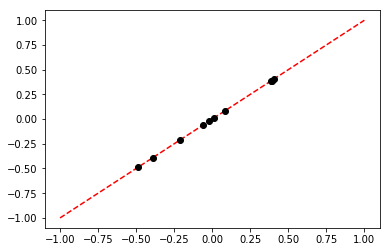

In [7]:
plt.plot([-1,1],[-1,1],'r--')
plt.plot(w,w_pred,'ko')